In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from yelpapi import YelpAPI
from scipy import stats

In [3]:
census_pd = pd.read_csv("project_data.csv")

# Preview the data
census_pd.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,4830620,2341093,2489527,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
1,Alaska,733375,384160,349215,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072
2,Arizona,6641928,3299088,3342840,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,...,20.442442,26.056832,9.813069,9.877096,1843.647444,78.244752,15.364818,6.225149,0.165941,9.469901
3,Arkansas,2958208,1451913,1506295,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,...,17.985693,23.384088,11.154891,17.531241,1831.021866,76.176204,17.080730,6.535620,0.206423,8.529489
4,California,38421464,19087135,19334329,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,...,19.192177,23.656127,9.582901,11.403417,2140.543627,77.245901,13.978921,8.592965,0.182876,10.191290


In [4]:
yelp_api = YelpAPI('clXvdDssfwpiryl9URikQMy0kRfdf8yZBWqPSc4pk-bdiK52Awc7eAQxakB8rv0c_xlMLyU7Saw_In-8dI6UHvIN2HQC739yByp0AV_VMiltc8yIKzLnzlYMUV_aW3Yx')

def price_rating(state): 

    results = []
    states = []
    prices = []
    cuisines = []
    ratings = []
    totalreviews = []
    search_results = yelp_api.search_query(term="restaurant", location=state, limit=50, sort_by="review_count")
    for business in search_results['businesses']:
        
        try:
            price = business['price']
        except KeyError:
            price = "n/a"
        try:    
            rating= business['rating']
        except KeyError:
            rating = "n/a"
        try:
            cuisine=business["categories"][0]['alias']
        except KeyError:
            cuisine = "n/a"
        try:
            state=business["location"]['state']
        except KeyError:
            state="n/a"
        try:    
            reviews=business['review_count']
        except KeyError:
            reviews="n/a"
            
        states.append(state)
        prices.append(price)
        ratings.append(rating)
        cuisines.append(cuisine)
        totalreviews.append(reviews)
        
    food_df = pd.DataFrame({'States': states, 'Prices': prices, 'Ratings': ratings, 'Cuisines': cuisines, 'Reviews': totalreviews})
        
    return food_df
all_food_data = pd.DataFrame()

for state in census_pd['State']:
    all_food_data=pd.concat([all_food_data, price_rating(state)])

all_food_data.head(5)

,States,Prices,Ratings,Cuisines,Reviews
0,AL,$$,4.5,bbq,621.0
1,AL,$$,4.5,mexican,481.0
2,AL,$$,4.5,bbq,461.0
3,AL,$$,4.5,cocktailbars,449.0
4,AL,$$,4.0,latin,434.0


In [55]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [6]:
#maria
census_pd['States'] = census_pd['State'].map(us_state_abbrev)
census_pd

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,States
0,Alabama,4830620,2341093,2489527,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,...,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723,AL
1,Alaska,733375,384160,349215,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,...,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072,AK
2,Arizona,6641928,3299088,3342840,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,...,26.056832,9.813069,9.877096,1843.647444,78.244752,15.364818,6.225149,0.165941,9.469901,AZ
3,Arkansas,2958208,1451913,1506295,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,...,23.384088,11.154891,17.531241,1831.021866,76.176204,17.080730,6.535620,0.206423,8.529489,AR
4,California,38421464,19087135,19334329,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,...,23.656127,9.582901,11.403417,2140.543627,77.245901,13.978921,8.592965,0.182876,10.191290,CA
5,Colorado,5278906,2648667,2630239,20.784380,69.895572,3.546377,0.573833,2.661997,0.119646,...,23.659547,9.867557,9.109790,2101.229784,78.643528,14.408333,6.760922,0.189239,7.194094,CO
6,Connecticut,3593222,1751607,1841615,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,...,23.498549,7.287062,10.088513,2138.555822,80.548368,12.997098,6.276300,0.180653,9.382104,CT
7,Delaware,926454,448413,478041,8.824766,64.632710,20.743925,0.259813,3.268692,0.019159,...,24.312150,8.321028,10.478037,1989.981651,81.122897,14.500000,4.237383,0.137383,7.952336,DE
8,District of Columbia,647484,306674,340810,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,...,19.022905,3.234078,4.708380,1887.234637,69.901676,25.828492,4.159218,0.109497,11.624581,DC
9,Florida,19645772,9600009,10045763,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,...,27.157345,9.296615,9.204561,2012.082686,80.926404,12.578877,6.328853,0.167643,10.021406,FL


In [58]:
merge_table = pd.merge(all_food_data, census_pd, on="States")
merge_table

,States,Prices,Ratings,Cuisines,Reviews,State,TotalPop,Men,Women,Hispanic,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,AL,$$,4.5,bbq,621.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
1,AL,$$,4.5,mexican,481.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
2,AL,$$,4.5,bbq,461.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
3,AL,$$,4.5,cocktailbars,449.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
4,AL,$$,4.0,latin,434.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
5,AL,$$,4.0,burgers,406.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
6,AL,$$,4.5,southern,347.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
7,AL,$,4.0,burgers,339.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
8,AL,$$,3.5,bbq,322.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
9,AL,$,4.5,cafes,319.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723


In [8]:
#maria
expensive = merge_table.loc[merge_table["Prices"] == "$$$", :]
expensive.head()

,States,Prices,Ratings,Cuisines,Reviews,State,TotalPop,Men,Women,Hispanic,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
10,AL,$$$,3.5,cajun,318.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
31,AL,$$$,4.5,southern,243.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
34,AL,$$$,4.5,seafood,233.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
40,AL,$$$,4.0,bars,222.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
54,AK,$$$,4.0,seafood,755.0,Alaska,733375,384160,349215,5.909581,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072


In [9]:
#maria-****
grouped_count_data = expensive.groupby(['States']).count()['Ratings']
grouped_count_data.head(20)

States
AK     6
AL     4
AR     2
AZ     3
CA     2
CO     8
CT     2
DC     8
DE     4
GA     6
HI     2
IA     3
ID     4
IL    11
IN     4
KS     4
KY     3
LA    10
MA    15
MD     5
Name: Ratings, dtype: int64

In [10]:
grouped_income_data = expensive.groupby(['States']).mean()['IncomePerCap']
grouped_income_data.head(20)

States
AK    33003.228916
AL    22840.097021
AR    22126.816058
AZ    26363.113891
CA    31154.595604
CO    32248.106280
CT    38528.915459
DC    46214.966480
DE    31446.654206
GA    25188.585890
HI    31189.028571
IA    27152.835966
ID    23439.120805
IL    29669.922632
IN    24021.820598
KS    26650.180501
KY    23609.212094
LA    24441.737123
MA    36427.568989
MD    36285.163427
Name: IncomePerCap, dtype: float64

In [11]:
df = pd.DataFrame({"count": grouped_count_data, "income": grouped_income_data})

In [12]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.sort_values("count", inplace=True, ascending=False)

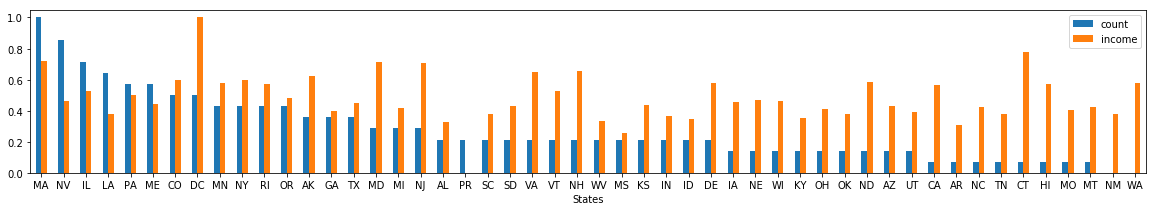

In [13]:
ax = df_norm.plot.bar(rot=0, figsize=(20,3))

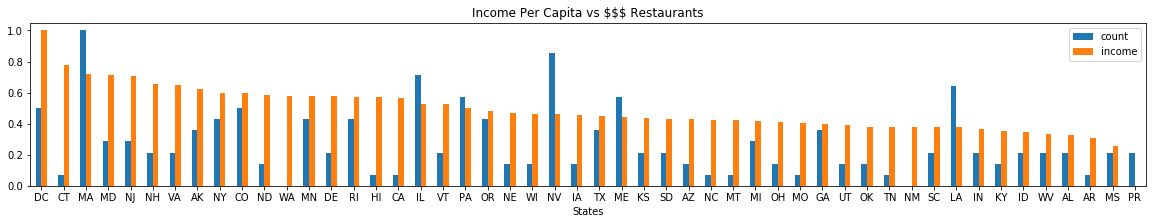

In [14]:
#by income
df_norm.sort_values("income", inplace=True, ascending=False)
ax = df_norm.plot.bar(rot=0, figsize=(20,3), title="Income Per Capita vs $$$ Restaurants")
plt.savefig('plot.png')

In [15]:
affordable = merge_table.loc[merge_table["Prices"] == "$", :]
affordable.head()

,States,Prices,Ratings,Cuisines,Reviews,State,TotalPop,Men,Women,Hispanic,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
7,AL,$,4.0,burgers,339.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
9,AL,$,4.5,cafes,319.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
20,AL,$,4.0,grocery,278.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
49,AL,$,4.5,burgers,203.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
68,AK,$,5.0,hotdog,264.0,Alaska,733375,384160,349215,5.909581,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072


In [16]:
grouped_onecount_data = affordable.groupby(['States']).count()['Ratings']
grouped_onecount_data.head(20)

States
AK     2
AL     4
AR     9
CA    10
CO     2
CT    11
DC     4
DE     6
GA     4
HI     5
IA    12
ID     9
IL     2
IN     6
KS    10
KY     3
LA     2
MA     3
MD     3
ME     1
Name: Ratings, dtype: int64

In [17]:
grouped_income_data_one = affordable.groupby(['States']).mean()['IncomePerCap']
grouped_income_data_one.head(20)

States
AK    33003.228916
AL    22840.097021
AR    22126.816058
CA    31154.595604
CO    32248.106280
CT    38528.915459
DC    46214.966480
DE    31446.654206
GA    25188.585890
HI    31189.028571
IA    27152.835966
ID    23439.120805
IL    29669.922632
IN    24021.820598
KS    26650.180501
KY    23609.212094
LA    24441.737123
MA    36427.568989
MD    36285.163427
ME    26837.390313
Name: IncomePerCap, dtype: float64

In [18]:
df_one = pd.DataFrame({"count": grouped_onecount_data, "income": grouped_income_data_one})

In [19]:
df_one_norm = (df - df.min()) / (df.max() - df.min())
df_one_norm.sort_values("count", inplace=True, ascending=False)

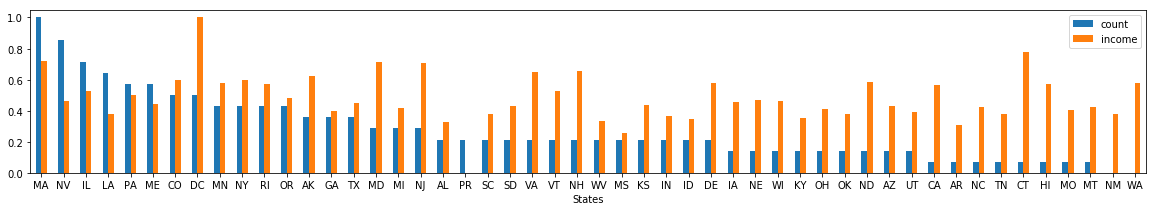

In [20]:
az = df_one_norm.plot.bar(rot=0, figsize=(20,3))

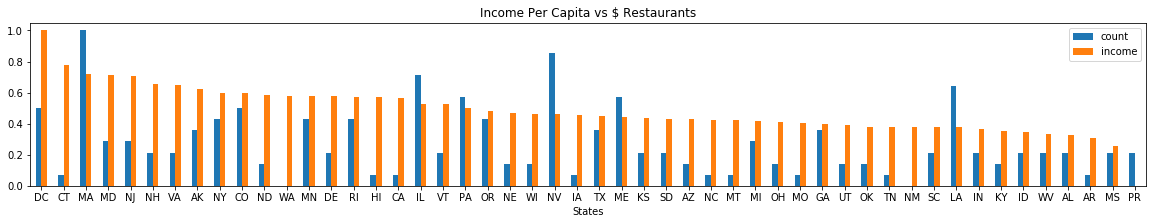

In [33]:
#by income
df_one_norm.sort_values("income", inplace=True, ascending=False)
zz = df_one_norm.plot.bar(rot=0, figsize=(20,3), title="Income Per Capita vs $ Restaurants")
plt.savefig('plot1.png')

In [22]:
ratio_one = (grouped_income_data_one/grouped_onecount_data)
ratio_one.head()

States
AK    16501.614458
AL     5710.024255
AR     2458.535118
CA     3115.459560
CO    16124.053140
dtype: float64

In [23]:
ratio_three = (grouped_income_data/grouped_count_data)
ratio_three.head()

States
AK     5500.538153
AL     5710.024255
AR    11063.408029
AZ     8787.704630
CA    15577.297802
dtype: float64

In [31]:
from scipy import stats

In [24]:
(t_stat, p) = stats.ttest_ind(ratio_one, ratio_three, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is -1.5936792747615494.
p-value is 0.11423597954462573.


In [154]:
#Coel
merged = pd.merge(all_food_data, census_pd, on="States")
state_avg_income = merged.groupby(['States']).mean()['IncomePerCap']

,States,Prices,Ratings,Cuisines,Reviews,State,TotalPop,Men,Women,Hispanic,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,AL,$$,4.5,bbq,621.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
1,AL,$$,4.5,mexican,481.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
2,AL,$$,4.5,bbq,461.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
3,AL,$$,4.5,cocktailbars,449.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
4,AL,$$,4.0,latin,434.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
5,AL,$$,4.0,burgers,406.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
6,AL,$$,4.5,southern,347.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
7,AL,$,4.0,burgers,339.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
8,AL,$$,3.5,bbq,322.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
9,AL,$,4.5,cafes,319.0,Alabama,4830620,2341093,2489527,3.751616,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723


In [86]:
merged['Ratings'].mean()

3.9788423153692616

In [153]:
high_rating = merged[merged.Ratings > 4]
low_rating = merged[merged.Ratings <= 4]
high_rating.head

<bound method NDFrame.head of      States Prices  Ratings          Cuisines  Reviews          State  \
0        AL     $$      4.5               bbq    621.0        Alabama   
1        AL     $$      4.5           mexican    481.0        Alabama   
2        AL     $$      4.5               bbq    461.0        Alabama   
3        AL     $$      4.5      cocktailbars    449.0        Alabama   
6        AL     $$      4.5          southern    347.0        Alabama   
9        AL      $      4.5             cafes    319.0        Alabama   
18       AL     $$      4.5            french    279.0        Alabama   
23       AL     $$      4.5       newamerican    274.0        Alabama   
30       AL     $$      4.5             sushi    244.0        Alabama   
31       AL    $$$      4.5          southern    243.0        Alabama   
32       AL     $$      4.5           arcades    239.0        Alabama   
33       AL     $$      4.5  breakfast_brunch    235.0        Alabama   
34       AL    $$$   

In [170]:
mergedhighavg = high_rating.groupby(['States']).mean()['Ratings']
mergedlowavg = low_rating.groupby(['States']).mean()['Ratings']
mergedhighratings.head()

0       4.5
1       4.5
2       4.5
3       4.5
6       4.5
50      4.5
52      4.5
57      4.5
60      4.5
68      5.0
100     4.5
102     4.5
103     4.5
104     4.5
107     4.5
151     4.5
152     4.5
154     4.5
156     4.5
157     4.5
206     4.5
207     4.5
209     4.5
214     4.5
215     4.5
250     4.5
251     4.5
253     4.5
257     4.5
263     4.5
       ... 
2213    4.5
2250    4.5
2254    4.5
2255    4.5
2256    4.5
2260    4.5
2301    4.5
2302    4.5
2305    4.5
2307    4.5
2309    4.5
2350    4.5
2357    4.5
2362    4.5
2365    5.0
2366    4.5
2400    4.5
2403    4.5
2404    4.5
2407    4.5
2418    4.5
2450    4.5
2454    4.5
2457    4.5
2459    4.5
2461    4.5
2500    5.0
2502    5.0
2503    5.0
2504    5.0
Name: Ratings, Length: 253, dtype: float64

In [172]:
highratings_and_income = pd.DataFrame({"Rating": mergedhighavg, "Income": state_avgincome})
lowratings_and_income = pd.DataFrame({"Rating": mergedlowavg, "Income": state_avgincome})
highratings_and_income.head()

,Rating,Income
AK,4.562500,33003.228916
AL,4.500000,22840.097021
AR,4.500000,22126.816058
AZ,4.527778,26363.113891
CA,4.500000,31154.595604


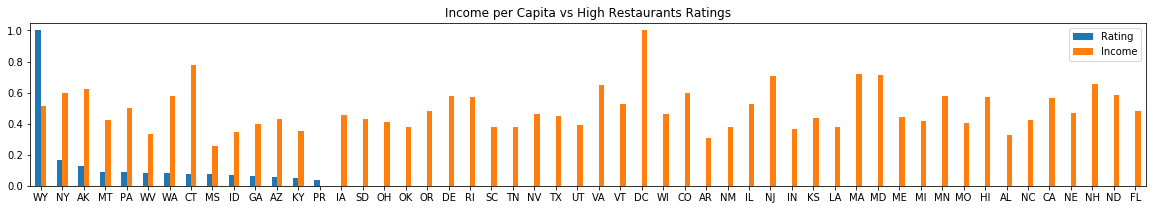

In [173]:
highratings_and_income_norm = (highratings_and_income - highratings_and_income.min()) / (highratings_and_income.max() - highratings_and_income.min())
highratings_and_income_norm.sort_values("Rating", inplace=True, ascending=False)
ax = highratings_and_income_norm.plot.bar(rot=0, figsize=(20,3), title="Income per Capita vs High Restaurants Ratings")
plt.savefig('plothighincome.png')

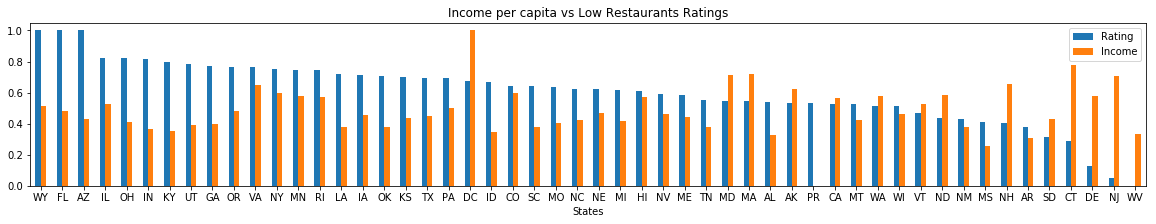

In [174]:
lowratings_and_income_norm = (lowratings_and_income - lowratings_and_income.min()) / (lowratings_and_income.max() - lowratings_and_income.min())
lowratings_and_income_norm.sort_values("Rating", inplace=True, ascending=False)
ax = lowratings_and_income_norm.plot.bar(rot=0, figsize=(20,3), title="Income per capita vs Low Restaurants Ratings")
plt.savefig('plotlowincome.png')

In [175]:
a_ratio = state_avgincome/mergedhighavg
a_ratio = a_ratio.dropna()
b_ratio = state_avgincome/mergedlowavg.dropna()
a_ratio

States
AK     7233.584420
AL     5075.577116
AR     4917.070235
AZ     5822.528221
CA     6923.243468
CO     7166.245840
CT     8489.422050
DC    10269.992551
DE     6988.145379
GA     5558.860334
HI     6930.895238
IA     6033.963548
ID     5170.394295
IL     6593.316141
IN     5338.182355
KS     5922.262333
KY     5218.878463
LA     5431.497138
MA     8095.015331
MD     8063.369650
ME     5963.864514
MI     5730.570389
MN     7003.939863
MO     5667.325963
MS     4478.966797
MT     5729.951333
NC     5793.510701
ND     7054.822764
NE     6171.005848
NH     7580.923896
NJ     7984.355933
NM     5445.767961
NV     6075.496645
NY     7037.435464
OH     5699.308247
OK     5468.914620
OR     6231.730909
PA     6332.208320
PR     2505.267158
RI     6934.132407
SC     5437.741114
SD     5871.313313
TN     5468.407983
TX     5986.818217
UT     5572.928775
VA     7571.769017
VT     6592.499089
WA     6948.061145
WI     6122.187235
WV     5048.951551
WY     5845.451908
dtype: float64

In [176]:
(t_stat, p) = stats.ttest_ind(a_ratio, b_ratio, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is -4.560364550158884.
p-value is 1.4777075101770466e-05.
